In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import pickle
import re


In [56]:
EVALUATION_DIR_PATH = "/home/victor/Desktop/CSUF/fall_2022/cpsc_483/segmentation_evaluations"

'''
'eval/miou_1.0_overall'
'pixel_accuracy'
'precision_1'
'recall_1'
'true_positives_3'
'true_negatives_3'
'false_positives_3'
'false_negatives_3'
'eval/miou_1.0_class_0'
'eval/miou_1.0_class_1'
'''

def merge_dictionaries(dict1, dict2):
    return(dict1.update(dict2))


def get_step_data(filename, key):
    metrics_dict = None
    with open(os.path.join(EVALUATION_DIR_PATH, filename), 'rb') as handle:
        metrics_dict = pickle.load(handle)
    
    steps = []
    data = []
    for path,value in metrics_dict.items():
        step = int(re.split('/|\.|-', path)[-1]) # get integer step from path
        steps.append(step)
        data.append(value[key])

    return np.asarray(steps), np.asarray(data)

def plot_curve(train_file, test_file, metric, model_name, deriv, delta, start_index, end_index=-1, loss=False):
    steps_train, data_train = get_step_data(train_file, metric)
    steps_test, data_test = get_step_data(test_file, metric)

    if loss:
        data_train = 1-data_train
        data_test = 1-data_test
    
    data_train_hat = savgol_filter(data_train, deriv, delta)
    data_test_hat = savgol_filter(data_test, deriv, delta)

    
    plt.plot(steps_train[start_index:end_index], 
             data_train[start_index:end_index],
             alpha=0.1, 
             color='blue')
    plt.plot(steps_test[start_index:end_index], 
             data_test[start_index:end_index], 
             alpha=0.1, 
             color='orange')
    plt.plot(steps_train[start_index:end_index], 
             data_train_hat[start_index:end_index], 
             label='train', 
             color='blue')
    plt.plot(steps_test[start_index:end_index], 
             data_test_hat[start_index:end_index], 
             label='validation', 
             color='orange')

    plt.legend()
    plt.title(model_name)
    plt.xlabel('Steps')
    #plt.ylabel("1 - " + metric)
    plt.ylabel("Recall Loss")
    plt.show()
    

    
def plot_recall0_curve(train_file, test_file, metric, model_name, deriv, delta, start_index, end_index=-1):
    steps_train, tn_train = get_step_data(train_file, "true_negatives_3")  
    _, fp_train = get_step_data(train_file, "false_positives_3")    

    steps_test, tn_test = get_step_data(test_file, "true_negatives_3")  
    _, fp_test = get_step_data(test_file, "false_positives_3")    

    recall_train = np.divide(tn_train, np.add(tn_train, fp_train))
    recall_test = np.divide(tn_test, np.add(tn_test, fp_test))

    data_train_hat = savgol_filter(recall_train, deriv, delta)
    data_test_hat = savgol_filter(recall_test, deriv, delta)
    
    end_index = min(end_index, len(steps_train))

    plt.plot(steps_train[start_index:end_index], 
             (1-recall_train)[start_index:end_index],
             alpha=0.1, 
             color='blue')
    plt.plot(steps_test[start_index:end_index], 
             (1-recall_test)[start_index:end_index], 
             alpha=0.1, 
             color='orange')
    plt.plot(steps_train[start_index:end_index], 
             (1-data_train_hat)[start_index:end_index], 
             label='train', 
             color='blue')
    plt.plot(steps_test[start_index:end_index], 
             (1-data_test_hat)[start_index:end_index], 
             label='validation', 
             color='orange')

    plt.legend()
    plt.title(model_name)
    plt.xlabel('steps')
    #plt.ylabel("1 - " + metric)
    plt.ylabel("recall loss")
    plt.show()

    
    
    
    
def plot_precision_curve(train_file, test_file, metric, model_name, deriv, delta, start_index, end_index=-1):
    steps_train, tn_train = get_step_data(train_file, "true_negatives_3")  
    _, fp_train = get_step_data(train_file, "false_negatives_3")    

    steps_test, tn_test = get_step_data(test_file, "true_negatives_3")  
    _, fp_test = get_step_data(test_file, "false_negatives_3")    

    recall_train = np.divide(tn_train, np.add(tn_train, fp_train))
    recall_test = np.divide(tn_test, np.add(tn_test, fp_test))

    data_train_hat = savgol_filter(recall_train, deriv, delta)
    data_test_hat = savgol_filter(recall_test, deriv, delta)
    
    end_index = min(end_index, len(steps_train))

    plt.plot(steps_train[start_index:end_index], 
             (1-recall_train)[start_index:end_index],
             alpha=0.1, 
             color='blue')
    plt.plot(steps_test[start_index:end_index], 
             (1-recall_test)[start_index:end_index], 
             alpha=0.1, 
             color='orange')
    plt.plot(steps_train[start_index:end_index], 
             (1-data_train_hat)[start_index:end_index], 
             label='train', 
             color='blue')
    plt.plot(steps_test[start_index:end_index], 
             (1-data_test_hat)[start_index:end_index], 
             label='validation', 
             color='orange')

    plt.legend()
    plt.title(model_name, fontsize=16)
    plt.xlabel('steps')
    #plt.ylabel("1 - " + metric)
    plt.ylabel("precision loss")
    plt.show()
    

    
    

def plot_recall0_curvez(train_file, test_file, metric, model_name, deriv, delta, start_index, end_index=-1):
    '''
    steps_resnet_train, tn_resnet_train = get_step_data(train_file, "true_negatives_3")  
    _, fp_resnet_train = get_step_data(train_file, "false_positives_3")    

    steps_resnet_test, tn_resnet_test = get_step_data(test_file, "true_negatives_3")  
    _, fp_resnet_test = get_step_data(test_file, "false_positives_3")    
    '''
    # recall_1
    # tp => tn    
    # tn => tp
    # fp => fn
    # fn => fp
    steps_resnet_train, tn_resnet_train = get_step_data(train_file, "true_positives_3")  
    _, fp_resnet_train = get_step_data(train_file, "false_negatives_3")    

    steps_resnet_test, tn_resnet_test = get_step_data(test_file, "true_positives_3")  
    _, fp_resnet_test = get_step_data(test_file, "false_negatives_3")    


    resnet_recall_train = np.divide(tn_resnet_train, np.add(tn_resnet_train, fp_resnet_train))
    resnet_recall_test = np.divide(tn_resnet_test, np.add(tn_resnet_test, fp_resnet_test))

    data_train_hat = savgol_filter(resnet_recall_train, deriv, delta)
    data_test_hat = savgol_filter(resnet_recall_test, deriv, delta)
    
    end_index = min(end_index, len(steps_resnet_train))

    plt.plot(steps_train[start_index:end_index], 
             (1-resnet_recall_train)[start_index:end_index],
             alpha=0.1, 
             color='blue')
    plt.plot(steps_test[start_index:end_index], 
             (1-resnet_recall_test)[start_index:end_index], 
             alpha=0.1, 
             color='orange')
    plt.plot(steps_train[start_index:end_index], 
             (1-data_train_hat)[start_index:end_index], 
             label='train', 
             color='blue')
    plt.plot(steps_test[start_index:end_index], 
             (1-data_test_hat)[start_index:end_index], 
             label='validation', 
             color='orange')
    
    

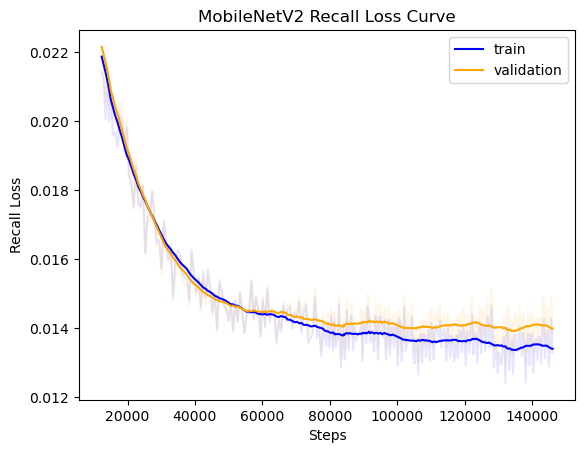

In [57]:
STEP_INDEX_START=25
STEP_INDEX_END=300
plot_curve(train_file="mobilenet_v2_metrics_322_train.pickle",
                test_file="mobilenet_v2_metrics_322_test.pickle",
                metric="recall_1",
                model_name="MobileNetV2 Recall Loss Curve",
                deriv=31,
                delta=1,
               start_index=STEP_INDEX_START,
               end_index=STEP_INDEX_END,
          loss=True)

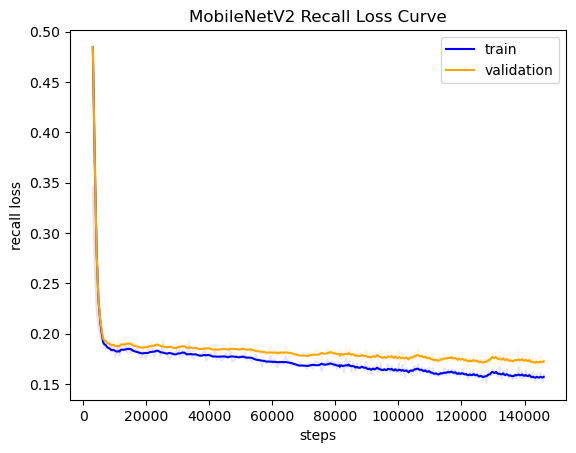

In [58]:
STEP_INDEX_START=5
STEP_INDEX_END=300
plot_recall0_curve(train_file="mobilenet_v2_metrics_322_train.pickle",
                test_file="mobilenet_v2_metrics_322_test.pickle",
                metric="recall_1",
                model_name="MobileNetV2 Recall Loss Curve",
                deriv=7,
                delta=1,
               start_index=STEP_INDEX_START,
               end_index=STEP_INDEX_END)

/tmp/ipykernel_8746/489157986.py:122: RuntimeWarning: invalid value encountered in divide
  recall_train = np.divide(tn_train, np.add(tn_train, fp_train))
/tmp/ipykernel_8746/489157986.py:123: RuntimeWarning: invalid value encountered in divide
  recall_test = np.divide(tn_test, np.add(tn_test, fp_test))


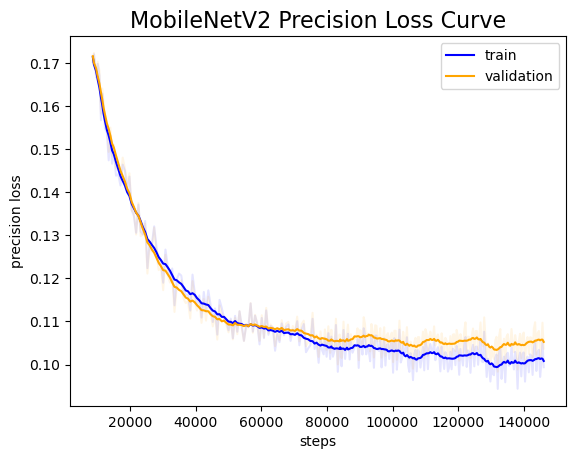

In [62]:
STEP_INDEX_START=17
STEP_INDEX_END=300 # 150k
plot_precision_curve(train_file="mobilenet_v2_metrics_322_train.pickle",
                test_file="mobilenet_v2_metrics_322_test.pickle",
                metric="precision",
                model_name="MobileNetV2 Precision Loss Curve",
                deriv=15,
                delta=1,
               start_index=STEP_INDEX_START,
               end_index=STEP_INDEX_END)

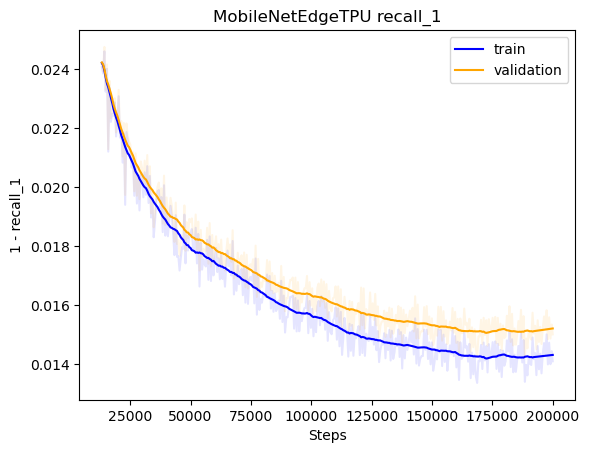

In [152]:

STEP_INDEX_START=25
STEP_INDEX_END=400

plot_curve(train_file="mobiletnet_etpu_metrics_train.pickle",
                test_file="mobilenet_etpu_metrics_test.pickle",
                metric="recall_1",
                model_name="MobileNetEdgeTPU",
                deriv=31,
                delta=1,
               start_index=STEP_INDEX_START,
               end_index=STEP_INDEX_END,
          loss=True)

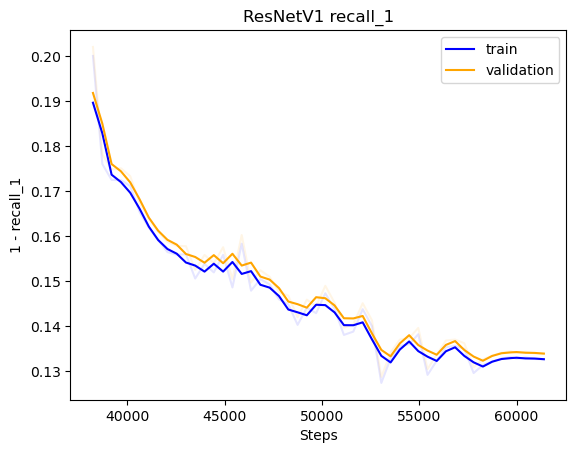

In [171]:

STEP_INDEX_START=80
STEP_INDEX_END=130

plot_curve(train_file="resnet_metrics_train_249.pickle",
                test_file="resnet_metrics_val_249.pickle",
                metric="recall_1",
                model_name="ResNetV1",
                deriv=3,
                delta=1,
               start_index=STEP_INDEX_START,
               end_index=STEP_INDEX_END,
          loss=False)

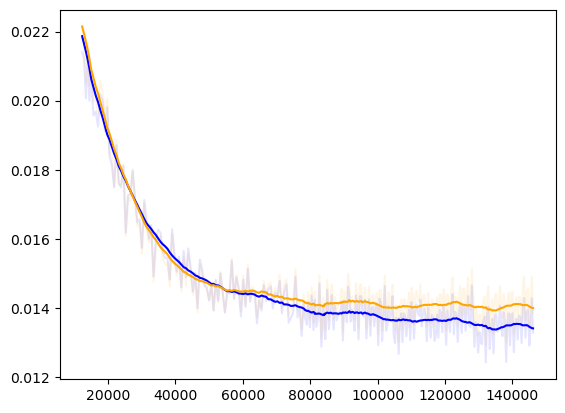

In [166]:
STEP_INDEX_START=25
STEP_INDEX_END=300
plot_recall0_curve(train_file="mobilenet_v2_metrics_322_train.pickle",
                test_file="mobilenet_v2_metrics_322_test.pickle",
                metric="recall_1",
                model_name="MobileNetV2",
                deriv=31,
                delta=1,
               start_index=STEP_INDEX_START,
               end_index=STEP_INDEX_END)

In [101]:

metrics_train_dict_1 = None
metrics_train_dict_2 = None
with open(os.path.join(EVALUATION_DIR_PATH, 'resnet_metrics_train.pickle'), 'rb') as handle:
    metrics_train_dict_1 = pickle.load(handle)
with open(os.path.join(EVALUATION_DIR_PATH, 'resnet_metrics_train_after60000and80000.pickle'), 'rb') as handle:
    metrics_train_dict_2 = pickle.load(handle)
    
    
print(len(metrics_train_dict_1.keys()))
metrics_train_dict_1.update(metrics_train_dict_2)
print(len(metrics_train_dict_1.keys()))



metrics_test_dict_1 = None
metrics_test_dict_2 = None
metrics_test_dict_3 = None
with open(os.path.join(EVALUATION_DIR_PATH, 'resnet_metrics_val.pickle'), 'rb') as handle:
    metrics_test_dict_1 = pickle.load(handle)
with open(os.path.join(EVALUATION_DIR_PATH, 'resnet_metrics_val_after60000.pickle'), 'rb') as handle:
    metrics_test_dict_2 = pickle.load(handle)
with open(os.path.join(EVALUATION_DIR_PATH, 'resnet_metrics_val_after80000.pickle'), 'rb') as handle:
    metrics_test_dict_3 = pickle.load(handle)

    
metrics_test_dict_1.update(metrics_test_dict_2)
metrics_test_dict_1.update(metrics_test_dict_3)
print(len(metrics_test_dict_1.keys()))



with open('resnet_metrics_train_249.pickle', 'wb') as handle:
    pickle.dump(metrics_train_dict_1, handle, protocol=pickle.HIGHEST_PROTOCOL)

    
with open('resnet_metrics_val_249.pickle', 'wb') as handle:
    pickle.dump(metrics_test_dict_1, handle, protocol=pickle.HIGHEST_PROTOCOL)



127
249
249
